# Intro

Fill in your name here.

In [1]:
name = 'Marco'
if name == '':
    raise NotImplementedError('Put your name')

We'll cover the following topics:
- Functions and Recursion.
- Generators.
- Basic OOP.
- Exceptions and Unit testing.
- Web Scraping.

You will receive points for:
- implementing the given tasks.
- using good practices such as OOP in some cases, or decorators.
- handling edge cases and exceptions.
- comprehensive unit tests (by using any of the libraries seen. I recommend `unittest`).


# Tasks

We will need the following libraries, but of course you can add the libraries you prefer.

In [2]:
from bs4 import BeautifulSoup
import requests 
import unittest
import validators
from collections import deque
import multiprocessing
import random
from functools import lru_cache
import unittest
from unittest import mock

## Task 1

The following function receives a URL, and tries to fetch all the links on it, and returns a list with all those links.

1. Modify the function so that it returns the expected links.

2. Be sure to do unit testing to check that the behaviour of the function is the one we expect.

3. Consider edge cases (for example, what if the given URL is not a valid URL).

In [7]:
def get_all_links_from_html(html: str):
    soup = BeautifulSoup(html, 'html.parser')
    for link in soup.find_all('a'):
        href = link.get('href')
        if validators.url(href):
            yield href
    
def get_all_links(url: str):
    """
    Get all the links in the webpage at the given URL

    :param url: A string that is the URL of the webpage where we need to find the links
    :return: A generator that will generate all the links of the given webpage (yield each of the links found)
    """
    response = requests.get(url)
    return get_all_links_from_html(response.text)

In [8]:
list(get_all_links('http://en.wikipedia.com'))[:10]

['https://donate.wikimedia.org/wiki/Special:FundraiserRedirector?utm_source=donate&utm_medium=sidebar&utm_campaign=C13_en.wikipedia.org&uselang=en',
 'https://www.wikidata.org/wiki/Special:EntityPage/Q5296',
 'https://commons.wikimedia.org/wiki/Main_Page',
 'https://foundation.wikimedia.org/wiki/Home',
 'https://www.mediawiki.org/wiki/MediaWiki',
 'https://meta.wikimedia.org/wiki/Main_Page',
 'https://outreach.wikimedia.org/wiki/Main_Page',
 'https://wikisource.org/wiki/Main_Page',
 'https://species.wikimedia.org/wiki/Main_Page',
 'https://en.wikibooks.org/wiki/Main_Page']

In [23]:
def my_request_get(url):
    class MockResponse:
        def __init__(self, text):
            self.text = text
    if url == "https://www.rust-lang.org/":
        return MockResponse("page1")
    if url == "https://stackoverflow.com/":
        return MockResponse("page2")
    return MockResponse("<a href='https://www.rust-lang.org/'></a><a href='https://stackoverflow.com/'></a>")

class TestAllLinks(unittest.TestCase):
    @mock.patch('requests.get', side_effect=my_request_get)
    def test_simple(self, mock_get):
        result = get_all_links("https://en.wikipedia.com")
        link = next(result)
        self.assertEqual(link, "https://www.rust-lang.org/")
        link = next(result)
        self.assertEqual(link, "https://stackoverflow.com/")
        self.assertRaises(StopIteration, next, result)
        self.assertIn(mock.call('https://en.wikipedia.com'), mock_get.call_args_list)

unittest.main(argv=[''], verbosity=2, exit=False)

test_simple (__main__.TestAllLinks) ... ok
test_two_neighbors (__main__.TestGetNeighbor) ... ok

----------------------------------------------------------------------
Ran 2 tests in 0.006s

OK


## Task 2

Create a generator (`get_neighbor_pages`) that receives a URL, but instead of returning a generator with all the links in that page, it should go to those links, and  **yield** their html content.

Remember to add unit tests.

In [24]:
def get_neighbor_pages(url: str):
    """
    Go through the links in the webpage at the given URL
    and yield the html content of each of them

    :param url: A string that is the URL of the webpage
    """
    links = get_all_links(url)
    for link in links:
        response = requests.get(link)
        yield response.text

In [25]:
gen = get_neighbor_pages('http://en.wikipedia.com')
for i in range(3):
    print(next(gen))

<!DOCTYPE html>
<html class="client-nojs" lang="en" dir="ltr">
<head>
<meta charset="UTF-8">
<title>Make your donation now - Wikimedia Foundation</title>
<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":true,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"802c09ec-79c3-4320-bb6c-f7cbc94f1792","wgCanonicalNamespace":"Special","wgCanonicalSpecialPageName":"FundraiserLandingPage","wgNamespaceNumber":-1,"wgPageName":"Special:LandingPage","wgTitle":"LandingPage","wgCurRevisionId":0,"wgRevisionId":0,"wgArticleId":0,"wgIsArticle":false,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":[],"wgPageViewLanguage":"en","wgPageContentLanguage":"en","wgPageContentModel":"wikitext","wgRelevantPageName":"Special:LandingPage","wgRelevantArtic

<!DOCTYPE html>
<html class="client-nojs" lang="en" dir="ltr">
<head>
<meta charset="UTF-8">
<title>Wikimedia main page - Wikidata</title>
<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":false,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"f2869719-b1bd-4624-8df0-a1ff2486cfe8","wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"Q5296","wgTitle":"Q5296","wgCurRevisionId":2062517649,"wgRevisionId":2062517649,"wgArticleId":6240,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":[],"wgPageViewLanguage":"en","wgPageContentLanguage":"en","wgPageContentModel":"wikibase-item","wgRelevantPageName":"Q5296","wgRelevantArticleId":6240,"wgIsProbablyEditable":false,"wgReleva

In [26]:
class TestGetNeighbor(unittest.TestCase):
    @mock.patch('requests.get', side_effect=my_request_get)
    def test_two_neighbors(self, mock_get):
        result = get_neighbor_pages("https://en.wikipedia.com")
        page1 = next(result)
        self.assertEqual(page1, "page1")
        page2 = next(result)
        self.assertEqual(page2, "page2")
        self.assertRaises(StopIteration, next, result)
        self.assertIn(mock.call('https://en.wikipedia.com'), mock_get.call_args_list)
        self.assertIn(mock.call('https://www.rust-lang.org/'), mock_get.call_args_list)
        self.assertIn(mock.call('https://stackoverflow.com/'), mock_get.call_args_list)

unittest.main(argv=[''], verbosity=2, exit=False)

test_simple (__main__.TestAllLinks) ... ok
test_two_neighbors (__main__.TestGetNeighbor) ... ok

----------------------------------------------------------------------
Ran 2 tests in 0.010s

OK


## Task 3

Create a function (`get_pages_depth()`) that receives a URL and a number `depth`, that will go through all the links the given URL, as deep as the given depth.

For example, let's say the current page `page_1` has a link to a page `page_2` and a link to a page `page_3`, and the page `page_2` has a link to a page `page_4`,  and `page_4` has a link to a page `page_5`, and `page_3` has a link to a page `page_6`, and `page_6` has a link to a page `page_7`.

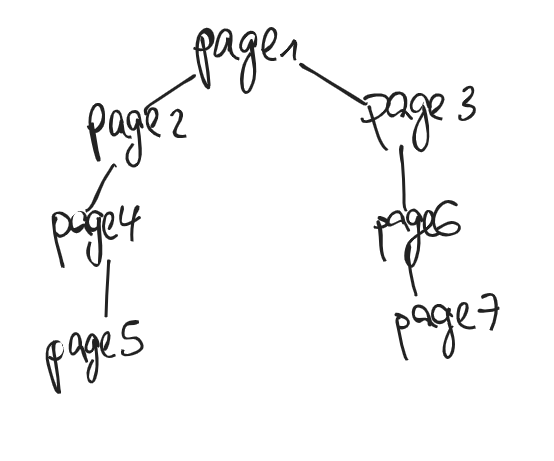

Then, if we call `get_pages_depth()` at `page_1` with `depth = 2`, then it should retrieve the pages `page_1`, `page_2`, `page_4`, `page_3` and `page_6`. We won't care about the order in which these pages are retrieved.

- Implement the function as a generator.

- Remember that a page might contain a link to a parent page, so try to take that into account.

- Consider any other edge cases that might happen, such as two pages leading to the same page. In that case, that page should only be retrieved once.

- Maybe you can add a decorator to handle such cases?

In [7]:
def get_pages_depth(url: str, depth: int):
    """
    Go as the dep as the given depth, through the links in the webpage at the given URL
    and yield the html content of each of them,  

    :param url: A string that is the URL of the webpage
    :param depth: An integer that is the depth until which the function searches
    """
    visited_pages = set(url)
    queue = deque()
    queue.append((url, 0))
    while len(queue) != 0:
        url, d = queue.popleft()
        yield url
        if d >= depth:
            continue
        neighbours = get_all_links(url)
        for neighbour in neighbours:
            if not neighbour in visited_pages:
                visited_pages.add(neighbour)
                queue.append((neighbour, d + 1))

In [8]:
pages = get_pages_depth(depth = 2, url = 'http://en.wikipedia.org')

In [9]:
next(pages)

'http://en.wikipedia.org'

## Task 4

Create a class `ComputerScientist` that will contain information such as `name`, `gender`, `birthdate`, `major_achievements`, `alma_mater`, etc.

- Implement the methods you consider appropriate.

- Make unit tests to make sure the methods work alright.

Write a script to go to this [list of computer scientists](https://en.wikipedia.org/wiki/List_of_computer_scientists) and fetch information about 100 random scientists from this list, and create a python `list` containing `ComputerScientist()` objects with the information retrieved from the given link.

In [28]:
class ComputerScientist:
    def __init__(
        self,
        name: str,
        birthdate: str,
        major_achievements: str,
        alma_mater: list[str]
    ):
        self.name = name
        self.birthdate = birthdate
        self.major_achievements = major_achievements
        self.alma_mater = alma_mater
    
    def describe(self):
        print(f"This is {self.name}")
        if self.birthdate != None:
            print(f"They were born at {self.birthdate}")
        if self.major_achievements != None:
            print(f"Their major achievements are {self.major_achievements}")
        if len(self.alma_mater) != 0:
            print(f"Alma mater: {', '.join(self.alma_mater)}")

In [55]:
def create_scientist_from_page(url, name):
    birthdate = None
    alma_mater = []
    major_achievements = None
    response = requests.get(url)
    if not response.ok:
        return None
    soup = BeautifulSoup(response.text, 'html.parser')
    table = soup.find("table", {"class": "biography"})
    if table != None:
        for tr in table.find_all("tr"):
            th = tr.find("th")
            if th == None:
                continue
            if th.text.startswith("Alma"):
                for a in tr.find_all("a"):
                    alma_mater.append(a.text)
            if th.text.startswith("Born"):
                birthdate = tr.find("td").get_text()
            if th.text.startswith("Known"):
                major_achievements = tr.find("td").get_text()
            
    return ComputerScientist(name, birthdate, major_achievements, alma_mater)

In [56]:
def get_scientists_names():
    response = requests.get("https://en.wikipedia.org/wiki/List_of_computer_scientists")
    soup = BeautifulSoup(response.text, 'html.parser')
    names = []
    for ul in soup.find_all('ul'):
        for li in ul.find_all('li'):
            a = li.find('a')
            if a == None:
                continue
            href = a["href"]
            if a.has_attr('class'):
                continue
            if not href.startswith("/wiki/"):
                continue
            if href.startswith("/wiki/Category"):
                continue
            if href.startswith("/wiki/Wikipedia"):
                continue
            if href.startswith("/wiki/List_"):
                continue
            if a.find('span') != None:
                continue
            names.append(("https://en.wikipedia.org" + href, a.text))
    return names


scientists = get_scientists_names()
random.shuffle(scientists)

def create_scientist_i(i):
    return create_scientist_from_page(*scientists[i])

pool = multiprocessing.Pool(processes = 10)
result = pool.map(create_scientist_i, range(100))
for i in range(len(result)):
    result[i].describe()
    print()

This is Abhay Bhushan
They were born at  (1944-11-23) 23 November 1944 (age 79)Allahabad, United Provinces, British India
Their major achievements are File Transfer Protocol
Alma mater: Indian Institute of Technology Kanpur, Massachusetts Institute of Technology, MIT Sloan School of Management

This is Robert S. Boyer
Their major achievements are Boyer–Moore string-search algorithm, Nqthm, ACL2

This is Mark Overmars
They were born at  (1958-09-29) 29 September 1958 (age 65)Zeist, Netherlands
Their major achievements are Probabilistic Roadmap Method, GameMaker
Alma mater: Utrecht University

This is Richard DeMillo
They were born at  (1947-01-26) January 26, 1947 (age 77)Hibbing, Minnesota
Alma mater: University of St. Thomas, Georgia Institute of Technology

This is James G. Nell

This is Charles Bachman
They were born at Charles William Bachman III(1924-12-11)December 11, 1924Manhattan, Kansas, U.S.
Their major achievements are Integrated Data Store
Alma mater: University of Pennsylv

In [57]:
class TestComputerScientist(unittest.TestCase):
    def test_alan(self):
        alan = create_scientist_from_page("https://en.wikipedia.org/wiki/Alan_Turing", "Alan Turing")
        self.assertEqual(alan.name, "Alan Turing")
        self.assertIsNotNone(alan.major_achievements)
        self.assertIsNotNone(alan.birthdate)
        self.assertNotEqual(len(alan.alma_mater), 0)

unittest.main(argv=[''], verbosity=2, exit=False)

test_simple (__main__.TestAllLinks) ... ok
test_alan (__main__.TestComputerScientist) ... ok
test_two_neighbors (__main__.TestGetNeighbor) ... ok

----------------------------------------------------------------------
Ran 3 tests in 0.889s

OK


# Task 5

Use the previously defined `ComputerScientist` class.

Add a new attribute `wikipedia_link` without modifying the definition of the original class. Consider using `setattr()`.

Write a function `fetch_scientist()` that will receive the name of a scientist, and will go to wikipedia and fetch the required scientist, and return a `ComputerScientist` object.

- Remember checking edge cases, such as the scientist not existing.

Add a decorator to cache the request, (i.e: store the answers, and if the scientist was already found before, to not execute the search again).

In [77]:
@lru_cache
def fetch_scientist(name: str):
    wikipedia_link = "https://en.wikipedia.org/wiki/" + name.replace(" ", "_")
    scientist = create_scientist_from_page(wikipedia_link, name)
    if scientist == None:
        return None
    setattr(scientist, "wikipedia_link", wikipedia_link)
    return scientist

In [85]:
alan_turing = fetch_scientist("Alan Turing")
print(alan_turing.wikipedia_link)
alan_turing.describe()

https://en.wikipedia.org/wiki/Alan_Turing
This is Alan Turing
They were born at Alan Mathison Turing(1912-06-23)23 June 1912Maida Vale, London, England
Alma mater: University of Cambridge, BA, MA, Princeton University


In [84]:
me = fetch_scientist("Marco Meijer")
print(me)

None
